# Simple and Multiple Linear Regression

## Today we will be trying to demonstrate a few concepts

- Linear regression is subject to the same kind of randomness t-tests are subject to. We will show why you need to be careful when interpreting linear regression coefficients
- We will work on building and evaluating simple regression models
- Building regressions with multiple variables
- How to check to make sure assumptions are satisfied

In [1]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1: You are given weights for 8 people. You will simulate data around how much money they have in their wallet that will have no relationship to their weight. You'll then ask linear regression to tell you if there is a relationship (knowing full well there isn't!)

In [2]:
weight = [160, 185, 190, 200, 205, 220, 235, 280] #this will be your Xx

###### To prove that you need to be careful interpreting regression coefficiecnts, generate 7 N(60,10) random variables with numpy, and call that variable money

In [3]:
random.seed(10)
money = np.random.normal(60, 10, 8)

In [4]:
np.arange(10,60,7)

array([10, 17, 24, 31, 38, 45, 52, 59])

In [5]:
money

array([ 59.27473839,  57.67877143,  57.11163458,  55.46251824,
        60.73226376,  78.24434681,  58.91341559,  54.81861325])

###### Combine them into a dataframe

In [6]:
zipped = zip(weight, money)
df = pd.DataFrame(zipped)

In [7]:
df.columns = ['Weight', 'Money']

In [8]:
df

,Weight,Money
0,160,59.274738
1,185,57.678771
2,190,57.111635
3,200,55.462518
4,205,60.732264
5,220,78.244347
6,235,58.913416
7,280,54.818613


In [9]:
df.shape

(8, 2)

###### Fit the linear model

In [10]:
import statsmodels.formula.api as smf

In [11]:
lm = smf.ols(formula='Money ~ Weight', data=df).fit()

In [12]:
lm.summary()

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1285: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.167
Method:                 Least Squares   F-statistic:                 0.0002453
Date:                Tue, 15 Dec 2015   Prob (F-statistic):              0.988
Time:                        15:57:39   Log-Likelihood:                -26.956
No. Observations:                   8   AIC:                             57.91
Df Residuals:                       6   BIC:                             58.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.5561     17.888      3.385      0.015        16.785   104.328
Weight        -0.0013      0.084     -0.016      0.988        -0.208     0.205
==============================================================================
Omnibus:                       18.022   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.141
Skew:                           1.973   Prob(JB):                       0.0281
Kurtosis:                       5.419   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
lm.params

Intercept    60.556072
Weight       -0.001321
dtype: float64

###### If you had to write the equation by hand what would it be? Calculate how much money the model expects you to have if you weigh 100 pounds. Interesting how the weight coefficient isn't 0 even though we know it should have no impact on money! Super important concept, if you don't understand this, ask a TA!

In [14]:
135.853059 + lm.params.Weight*200

135.58890695148926

###### What is the p-value for the weight variable? Should you use it? If not, what is the new estimate for how much money someone who is 100 lbs has in their wallet?

In [15]:
lm.pvalues

Intercept    0.014763
Weight       0.988012
dtype: float64

In [16]:
df.Weight.mean()

209.375

In [17]:
df.Money.mean()

60.279537757657373

In [18]:
from scipy import stats
X, y = df.Weight, df.Money
stats.ttest_rel(X, y)

Ttest_relResult(statistic=11.333174571798159, pvalue=9.3234209501344287e-06)

### Problem 2: Edwin hubble once measured the distance of nebulae outside of the Milkway Way, and was surprised that he found a relationship between a nebula's distance from the earth and the velocity with which it was moving away. This was the data the initially supported the idea of the big bang. Here you'll analyze the data and see if you come up with teh same conclusoin. 

###### Read the data from "../../data/nebula.csv" and plot a scatter plot (plot.scatter(x,y)) - with velocity on the X axis, and distance on the Y

In [22]:
data = pd.read_csv("../../DAT-NYC-29/data/nebula.csv")

In [23]:
data.tail()

,Velocity,Distance
19,960,1.7
20,500,2.0
21,850,2.0
22,800,2.0
23,1090,2.0


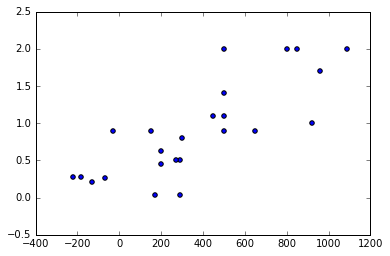

In [24]:
plt.scatter(data.Velocity, data.Distance)

###### Fit the regression. According to the Big Bang theory, the distance should just be Time * Velocity (with no intercept). Does that relationship hold here?

In [25]:
lm2 = smf.ols(formula='Velocity ~ Distance', data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     36.29
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           4.61e-06
Time:                        16:03:00   Log-Likelihood:                -163.86
No. Observations:                  24   AIC:                             331.7
Df Residuals:                      22   BIC:                             334.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -40.2495     83.516     -0.482      0.635      -213.450   132.951
Distance     453.6346     75.304      6.024      0.000       297.464   609.805
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.294
Skew:                           0.136   Prob(JB):                        0.863
Kurtosis:                       2.532   Cond. No.                         3.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
def find_time(velocity, distance):
    
    time = distance / velocity
    
    return time

In [27]:
data['time'] = find_time(data.Velocity,data.Distance)

In [28]:
data

,Velocity,Distance,time
0,170,0.03,0.000176
1,290,0.03,0.000103
2,-130,0.21,-0.001615
3,-70,0.26,-0.003714
4,-185,0.28,-0.001514
5,-220,0.28,-0.001273
6,200,0.45,0.002250
7,290,0.50,0.001724
8,270,0.50,0.001852
9,200,0.63,0.003150


In [29]:
my_list

NameError: name 'my_list' is not defined

In [30]:
times = []
for row in data:
    times.append(find_time(data.Velocity, data.Distance))

In [31]:
times

[0     0.000176
 1     0.000103
 2    -0.001615
 3    -0.003714
 4    -0.001514
 5    -0.001273
 6     0.002250
 7     0.001724
 8     0.001852
 9     0.003150
 10    0.002667
 11   -0.030000
 12    0.001385
 13    0.006000
 14    0.001800
 15    0.001087
 16    0.002444
 17    0.002200
 18    0.002800
 19    0.001771
 20    0.004000
 21    0.002353
 22    0.002500
 23    0.001835
 dtype: float64, 0     0.000176
 1     0.000103
 2    -0.001615
 3    -0.003714
 4    -0.001514
 5    -0.001273
 6     0.002250
 7     0.001724
 8     0.001852
 9     0.003150
 10    0.002667
 11   -0.030000
 12    0.001385
 13    0.006000
 14    0.001800
 15    0.001087
 16    0.002444
 17    0.002200
 18    0.002800
 19    0.001771
 20    0.004000
 21    0.002353
 22    0.002500
 23    0.001835
 dtype: float64, 0     0.000176
 1     0.000103
 2    -0.001615
 3    -0.003714
 4    -0.001514
 5    -0.001273
 6     0.002250
 7     0.001724
 8     0.001852
 9     0.003150
 10    0.002667
 11   -0.030000
 12    0

###### Let's see if we can manually calculate the R^2 value. The R2 is supposed to explain how well our linear regression fits the data. There are two main factors that go into an R2

- Total Sum of Squares (TSS): This is a measure of how much the data varies overall. If this number is big, it means the data is all over the place, if it is small it means the data is similar. It is calculated by taking the sum of squares for the difference between the y-values, and the overall mean of the all the ys
  - First calculate the mean of the ys
  - Subtract it from each of the actual ys
  - Square that subtraction
  - Sum up the results
- Residual Sum of Squares (RSS): This is effectively a measure for how much variation there is after you created your model. If you created a great model, the variation should be small. If the model didn't work, the varation will be big
  - Predict what the values of y would be for the Xs that you have
  - Subract the predicted (or fitted) ys from the actual ys
  - Suare that difference
  - Sum up the results
- Now we can calculate the R^2 Value:
  - (TSS-RSS)/TSS

### Total Sum of Squares

###### Calculate the mean of the true Ys (Distance)

###### Square the difference between the real Ys and the mean, and then sum it up

In [32]:
yd = data.Distance.mean()
diff = np.square(data.Distance - yd).sum()

In [33]:
float(diff)
print "I'm not quite sure if %d is a 'big' number or not" % diff

I'm not quite sure if 9 is a 'big' number or not


#### Residual Sum of Squares

###### Get the values for what Y would be according to the model (Hint: you can can use lm.predict())

###### Square the difference between the actual Ys and the fitted ys and sum it up

###### Now calculate the R^2. It should be very close to the one outputted by statsmodels

## Multiple Regression Analysis

###### Here you will try to understand the relationship between marketing spend and purchases made of your product

###### Read in the spend data from "../../data/spend.csv"

In [34]:
spend = pd.read_csv("../DAT-NYC-29/data/spend.csv")

IOError: File ../DAT-NYC-29/data/spend.csv does not exist

In [35]:
spend.head()

NameError: name 'spend' is not defined

###### Plot the data

In [36]:
plt.scatter(spend.purchases, spend.spend)

NameError: name 'spend' is not defined

###### You notice that the model begins to taper out above. How can we better fit it than just spend vs purchases?

###### compare this with a model that doesnt use the Squared term. Which one should we use?